In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from IPython.display import display

In [23]:
#한글 폰트 설정
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)


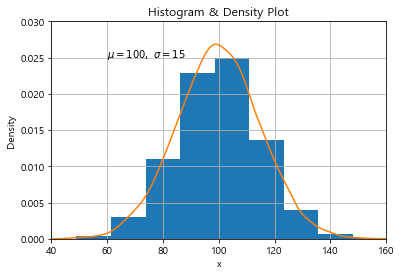

In [24]:
#histogram & kernel density estimation plot
# 평균(mu), 표준편차(sigma)를 이용한 정규분포 그래프
mu, sigma = 100, 15
x = pd.Series(mu+sigma * np.random.randn(10000))

#histogram과 density를 동시에 시각화
#density = True, Y축을 빈도수(frequency)가 아닌 확률(Probability)로 처리해야함
x.plot.hist(density=True)
x.plot.kde()

plt.xlabel('x')
plt.title('Histogram & Density Plot')
plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.axis([40,160,0,0.03])
plt.grid(True)
plt.show()

In [25]:
import seaborn as sns

# (1)타이나틴호 데이터셋 로드
titanic = sns.load_dataset("titanic")
display("titanic.head() = ", titanic.head())

# (2)데이터 타입확인
print("데이터 타입 \n", titanic.dtypes)
print()
# (3)데이터 구조확인
print("index\n", titanic.index)
print("columns\n", titanic.columns)
print("shape\n", titanic.shape)

'titanic.head() = '

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


데이터 타입 
 survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

index
 RangeIndex(start=0, stop=891, step=1)
columns
 Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')
shape
 (891, 15)


In [26]:
# 누락된 데이터 값 확인
s= titanic.isnull().sum()
print(s)

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [27]:
# 누락된 값이 많은 칼럼 삭제
del titanic['deck']

In [28]:
# 누락된 값 있는 행 삭제(age)에서
s = titanic.isnull().sum().any()
# 여기 뒤에 any()안붙이면 오류남,,

print(s)
if s > 0:
    titanic.dropna(how='any', inplace=True)

True


In [29]:
print(titanic.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     712 non-null    int64   
 1   pclass       712 non-null    int64   
 2   sex          712 non-null    object  
 3   age          712 non-null    float64 
 4   sibsp        712 non-null    int64   
 5   parch        712 non-null    int64   
 6   fare         712 non-null    float64 
 7   embarked     712 non-null    object  
 8   class        712 non-null    category
 9   who          712 non-null    object  
 10  adult_male   712 non-null    bool    
 11  embark_town  712 non-null    object  
 12  alive        712 non-null    object  
 13  alone        712 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(5)
memory usage: 68.9+ KB
None


In [30]:
print(titanic.describe())

         survived      pclass         age       sibsp       parch        fare
count  712.000000  712.000000  712.000000  712.000000  712.000000  712.000000
mean     0.404494    2.240169   29.642093    0.514045    0.432584   34.567251
std      0.491139    0.836854   14.492933    0.930692    0.854181   52.938648
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    1.000000   20.000000    0.000000    0.000000    8.050000
50%      0.000000    2.000000   28.000000    0.000000    0.000000   15.645850
75%      1.000000    3.000000   38.000000    1.000000    1.000000   33.000000
max      1.000000    3.000000   80.000000    5.000000    6.000000  512.329200


<Figure size 360x360 with 0 Axes>

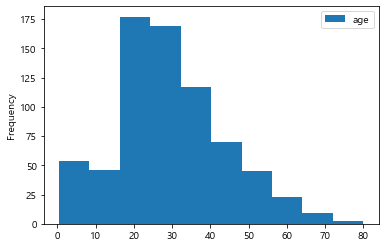

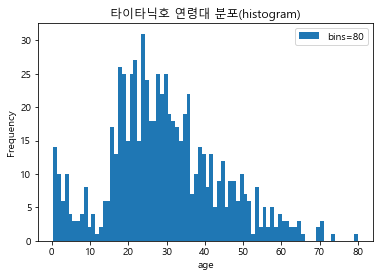

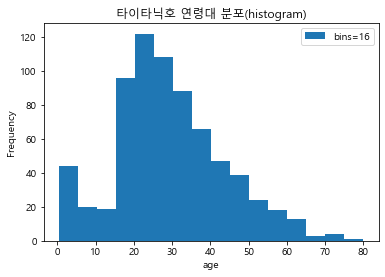

In [31]:
plt.figure(1, figsize=(5,5))
titanic.plot.hist(y='age')

titanic.plot.hist(y='age', bins=80, label='bins=80')
plt.title('타이타닉호 연령대 분포(histogram)')
plt.xlabel('age')
plt.show()

#5세 구간 설정
titanic.plot.hist(y='age', bins = 16, label='bins=16')
plt.title('타이타닉호 연령대 분포(histogram)')
plt.xlabel('age')
plt.show()

C:\201814471\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\201814471\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


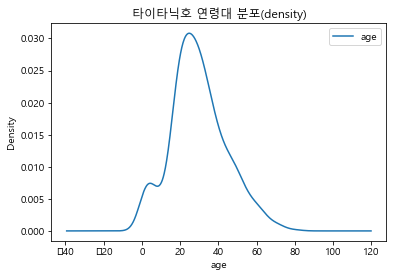

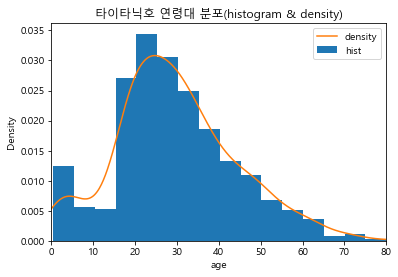

In [33]:
titanic.plot.kde(y='age')
plt.title('타이타닉호 연령대 분포(density)')
plt.xlabel('age')
plt.show()

#histogram과 density를 함께 plotting
ax = titanic.plot.hist(y='age', bins=16, density=True)
titanic.plot.kde(y='age', ax=ax)
plt.xlim([0, 80])
plt.title('타이타닉호 연령대 분포(histogram & density)')
plt.xlabel('age')
plt.legend(labels=['density', 'hist'])
plt.show()

C:\201814471\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


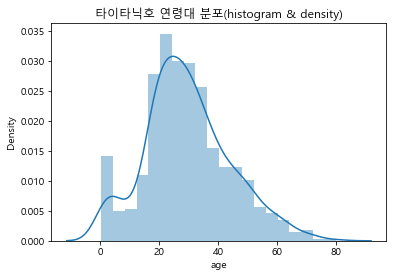

C:\201814471\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


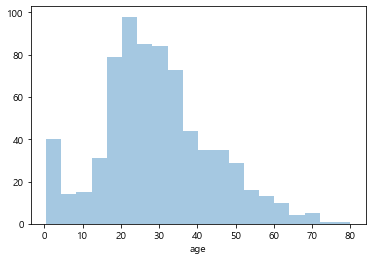

C:\201814471\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


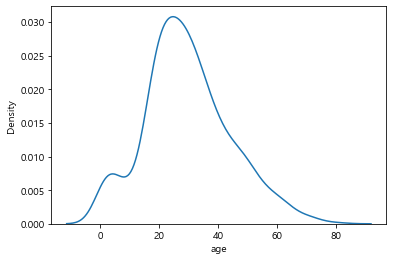

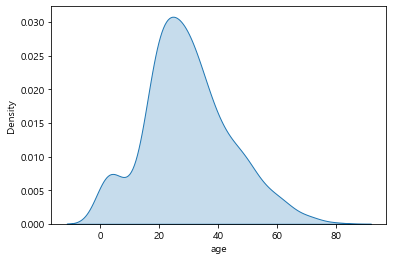

In [36]:
import seaborn as sns
sns.distplot(titanic['age'])
plt.title('타이타닉호 연령대 분포(histogram & density)')
plt.xlabel('age')
plt.show()

sns.distplot(titanic['age'], hist=True, kde=False)
plt.show()

sns.distplot(titanic['age'], hist=False, kde=True)
plt.show()

sns.kdeplot(titanic['age'], shade=True)
plt.show()

In [37]:
grouped = titanic.groupby('sex')

for name, group in grouped : 
    print('groupname: ', name)
    print('groupdata: ')
    print(group)

groupname:  female
groupdata: 
     survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
8           1       3  female  27.0      0      2  11.1333        S   Third   
9           1       2  female  14.0      1      0  30.0708        C  Second   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
879         1       1  female  56.0      0      1  83.1583        C   First   
880         1       2  female  25.0      0      1  26.0000        S  Second   
882         0       3  female  22.0      0      0  10.5167        S   Third   
885         0       3  female  39.0      0      5  29.1250        Q   Third   
887         1       1  female  19.0      0      0  30.0000        S   First   

       who  adult_ma

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,Cherbourg,yes,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,Cherbourg,yes,False
880,1,2,female,25.0,0,1,26.0000,S,Second,woman,False,Southampton,yes,False
882,0,3,female,22.0,0,0,10.5167,S,Third,woman,False,Southampton,no,True
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,Queenstown,no,False


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,Southampton,no,False
12,0,3,male,20.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883,0,2,male,28.0,0,0,10.5000,S,Second,man,True,Southampton,no,True
884,0,3,male,25.0,0,0,7.0500,S,Third,man,True,Southampton,no,True
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,no,True
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


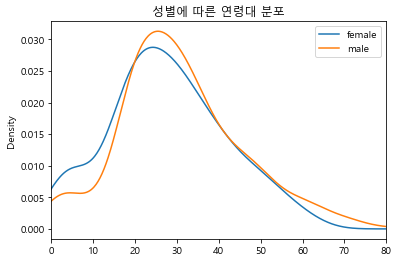

In [40]:
f = grouped.get_group(name='female')
m = grouped.get_group(name='male')
display(f)

display(m)

ax = f.plot.kde(y='age', label = 'female')
m.plot.kde(y='age', label='male', ax = ax)
plt.xlim(0, 80)
plt.legend()
plt.title('성별에 따른 연령대 분포')
plt.show()

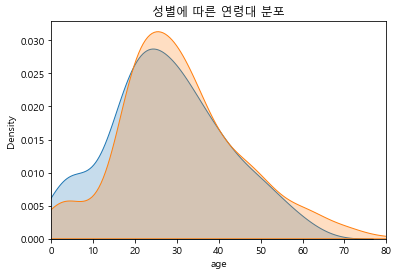

In [41]:
sns.kdeplot(f['age'], shade=True, label='female')
sns.kdeplot(m['age'], shade=True, label='male')
plt.xlim(0, 80)
plt.title('성별에 따른 연령대 분포')
plt.show()